In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [40]:
total_df = pd.DataFrame()
startup_df = pd.DataFrame()

for i in range(1,31):
    for j in range(10):
        path = f"local-test-experiments/round_{i}/peer{j}/evaluation_results/evaluation.csv"
        df = pd.read_csv(path)
        df['delta'] = 5
        df['round'] = i

        path = f"local-test-experiments/round_{i}/peer{j}/evaluation_results/startup.csv"
        start_df = pd.read_csv(path)
        # Taking the first row of the start_df to get the start_time
        start_time = start_df['start_time'].iloc[0]
        # Takimg the last row of the start_df to get the end_time
        end_time = start_df['end_time'].iloc[-1]
        # Calculatimg the elapsed time
        elapsed_time = end_time - start_time
        # Getting the port
        port = start_df['portnum'].iloc[0]
        row = pd.DataFrame({'start_time': [start_time], 'end_time': [end_time], 'elapsed_time': [elapsed_time], 'port': [port], 'round': [i]})

        total_df = pd.concat([total_df, df])
        startup_df = pd.concat([startup_df, row])


In [41]:
total_df

,start_time,end_time,delta,elapsed_time,message_size,sending,from,to,num_peers,message_type,round
0,1.721567e+09,1.721567e+09,5,0.001439,2183,False,80.57.135.211:8099,80.57.135.211:8092,0,SEND_MODEL,1
1,1.721567e+09,1.721567e+09,5,0.000130,2083,False,80.57.135.211:8097,80.57.135.211:8092,0,SEND_MODEL,1
2,1.721567e+09,1.721567e+09,5,0.000120,2027,False,80.57.135.211:8098,80.57.135.211:8092,0,SEND_MODEL,1
3,1.721567e+09,1.721567e+09,5,0.000133,105,False,80.57.135.211:8093,80.57.135.211:8092,0,AUTO_NODE_JOINED,1
4,1.721567e+09,1.721567e+09,5,0.000184,4035,False,80.57.135.211:8093,80.57.135.211:8092,1,SEND_MODEL,1
...,...,...,...,...,...,...,...,...,...,...,...
108,1.721591e+09,1.721591e+09,5,0.009727,29733,True,80.57.135.211:8101,80.57.135.211:8099,9,SEND_MODEL,30
109,1.721591e+09,1.721591e+09,5,0.010892,29767,False,80.57.135.211:8095,80.57.135.211:8101,9,SEND_MODEL,30
110,1.721591e+09,1.721591e+09,5,0.010465,29767,False,80.57.135.211:8096,80.57.135.211:8101,9,SEND_MODEL,30
111,1.721591e+09,1.721591e+09,5,0.010883,29733,True,80.57.135.211:8101,80.57.135.211:8099,9,SEND_MODEL,30


In [42]:
startup_df['start_time'] = startup_df['start_time'].astype(float)
startup_df['start_time'] = startup_df['start_time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

startup_df['end_time'] = startup_df['end_time'].astype(float)
startup_df['end_time'] = startup_df['end_time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

startup_df

,start_time,end_time,elapsed_time,port,round
0,2024-07-21 16:07:59,2024-07-21 16:11:17,197.873352,8092,1
0,2024-07-21 16:07:58,2024-07-21 16:11:15,196.881896,8093,1
0,2024-07-21 16:07:58,2024-07-21 16:10:46,168.043809,8094,1
0,2024-07-21 16:07:59,2024-07-21 16:10:45,166.654140,8095,1
0,2024-07-21 16:07:57,2024-07-21 16:10:46,169.053189,8096,1
...,...,...,...,...,...
0,2024-07-21 22:28:38,2024-07-21 22:31:27,168.682475,8097,30
0,2024-07-21 22:28:37,2024-07-21 22:31:24,167.278310,8098,30
0,2024-07-21 22:28:37,2024-07-21 22:31:24,167.056956,8099,30
0,2024-07-21 22:28:40,2024-07-21 22:30:58,138.250694,8100,30


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/459615054.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors, showmeans=True)
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/459615054.py:7: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors, showmeans=True)


<Axes: title={'center': 'Startup Time for Each Peer'}, xlabel='Port Number', ylabel='Elapsed Time [s]'>

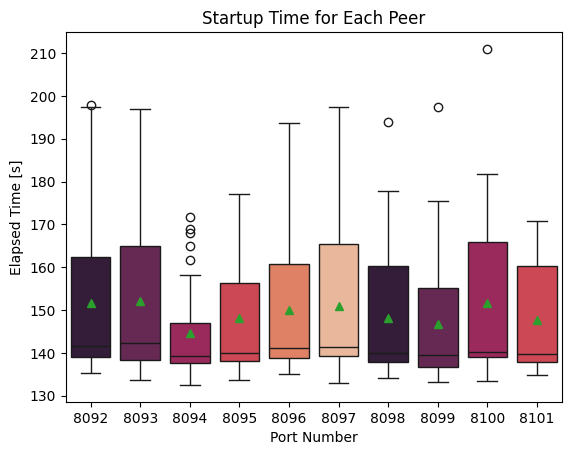

In [43]:
colors = sns.color_palette('rocket')[0:10]

plt.xlabel('Port Number')
plt.ylabel('Elapsed Time [s]')
plt.title('Startup Time for Each Peer')

sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors, showmeans=True)

In [44]:
startup_df.groupby('port').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
port,,,,,,,,
8092,30.0,151.724093,17.709699,135.194918,138.952261,141.537034,162.423731,197.873352
8093,30.0,152.226382,17.023212,133.627177,138.415646,142.202098,165.024354,196.881896
8094,30.0,144.627386,11.446782,132.525893,137.713861,139.206625,146.964870,171.668219
8095,30.0,148.073029,13.341783,133.785539,138.037315,140.052402,156.334252,177.028313
8096,30.0,149.997393,15.361009,135.137173,138.747966,141.147570,160.857709,193.672807
8097,30.0,150.983022,16.184524,133.032536,139.266568,141.329968,165.328746,197.284491
8098,30.0,148.219298,15.378994,134.158362,137.782589,140.055956,160.269761,194.001554
8099,30.0,146.830328,15.745601,133.307977,136.797669,139.451642,155.136793,197.377840
8100,30.0,151.532802,18.676177,133.453511,139.085942,140.139833,165.923541,210.950853


In [45]:
startup_df.groupby('port').describe()['elapsed_time']['mean'].mean()

np.float64(149.17767030954363)

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/3922137465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/3922137465.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipy

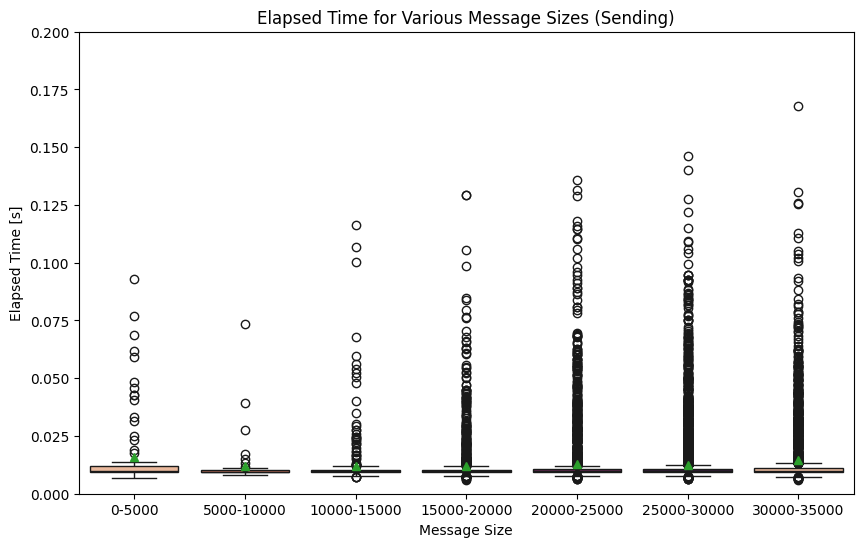

In [46]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('rocket_r')

temp = total_df[(total_df['num_peers'] == 9) & (total_df['message_type'] == 'SEND_MODEL') & (total_df['sending'] == True)]
temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])

sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)

plt.ylim(0, 0.2)

plt.xlabel('Message Size')
plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Various Message Sizes (Sending)')

plt.show()

In [47]:
# summarize temp
temp.groupby('message_size').describe()['elapsed_time']

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/3884701108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby('message_size').describe()['elapsed_time']


,count,mean,std,min,25%,50%,75%,max
message_size,,,,,,,,
0-5000,98.0,0.015690,0.015796,0.006939,0.009207,0.009733,0.011882,0.092816
5000-10000,51.0,0.012134,0.010091,0.008176,0.009321,0.009506,0.010133,0.073608
10000-15000,423.0,0.011950,0.010597,0.007028,0.009331,0.009704,0.010412,0.116480
15000-20000,1675.0,0.011938,0.009429,0.006155,0.009323,0.009706,0.010474,0.129514
20000-25000,3493.0,0.012872,0.026247,0.006239,0.009368,0.009720,0.010512,1.015338
25000-30000,6053.0,0.012234,0.009779,0.006249,0.009415,0.009834,0.010692,0.146187
30000-35000,2716.0,0.014401,0.031436,0.006147,0.009401,0.009865,0.010931,1.177489


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/2089201812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/2089201812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipy

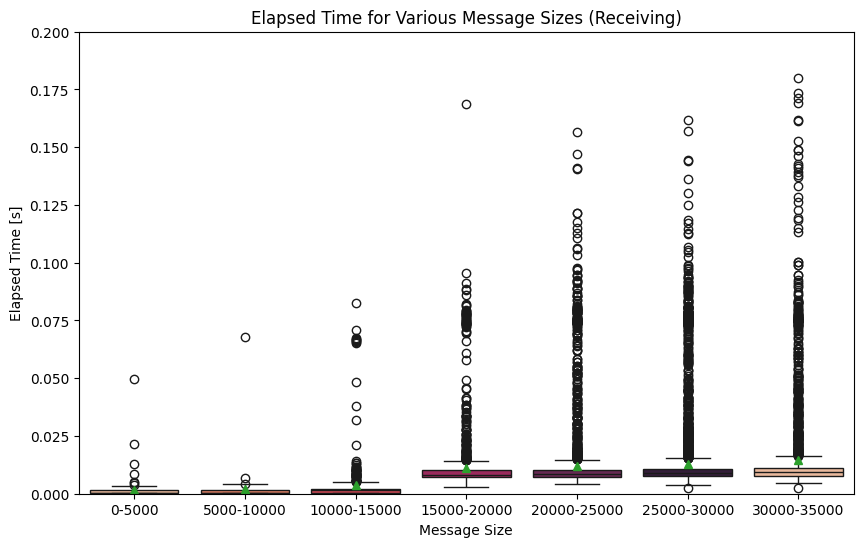

In [48]:
plt.figure(figsize=(10,6))

temp = total_df[(total_df['num_peers'] == 9) & (total_df['message_type'] == 'SEND_MODEL') & (total_df['sending'] == False)]
temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-35000'])

sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)

plt.ylim(0, 0.2)

plt.xlabel('Message Size')
plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Various Message Sizes (Receiving)')

plt.show()

In [49]:
temp.groupby('message_size').describe()['elapsed_time']

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/1357080292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby('message_size').describe()['elapsed_time']


,count,mean,std,min,25%,50%,75%,max
message_size,,,,,,,,
0-5000,98.0,0.001622,0.005602,0.000105,0.000129,0.000149,0.001493,0.049569
5000-10000,50.0,0.002200,0.009587,0.000109,0.000134,0.000148,0.001746,0.067974
10000-15000,420.0,0.003718,0.010537,0.000112,0.000161,0.001616,0.002154,0.082657
15000-20000,1647.0,0.011201,0.012410,0.003064,0.007305,0.008320,0.010136,0.168567
20000-25000,3501.0,0.012037,0.014421,0.004182,0.007442,0.008537,0.010377,0.156481
25000-30000,6054.0,0.012700,0.014641,0.002558,0.007744,0.009167,0.010872,0.161877
30000-35000,2724.0,0.014566,0.020040,0.002301,0.007856,0.009494,0.011188,0.263201


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/566024231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sending", y="message_size", data=sent_data, ax=ax, palette="rocket", width=0.5)


Text(0.5, 1.0, 'Message Size Distribution')

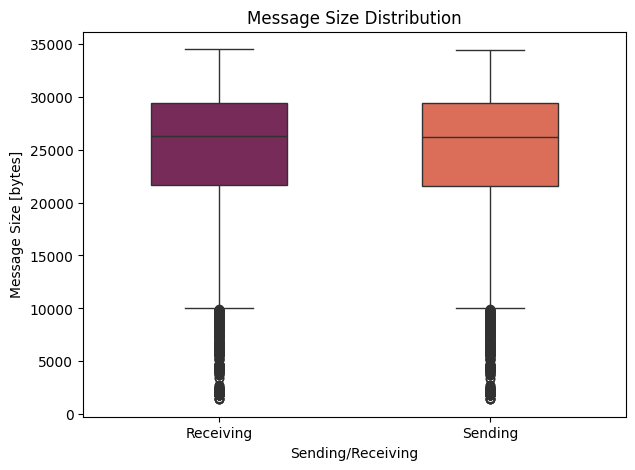

In [50]:
fig, ax = plt.subplots(figsize=(7, 5))

sent_data = total_df[total_df["message_type"] == "SEND_MODEL"]

sns.boxplot(x="sending", y="message_size", data=sent_data, ax=ax, palette="rocket", width=0.5)

plt.xticks(ticks=[True, False], labels=["Sending", "Receiving"])
plt.xlabel('Sending/Receiving')
plt.ylabel('Message Size [bytes]')
plt.title('Message Size Distribution')

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/3357283753.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_data['cumulative_elapsed_time'] = sent_data['start_time'].diff().fillna(0).cumsum()
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/3357283753.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="cumulative_elapsed_time", y="message_size", data=sent_data, ax=ax, marker="o", palette="rocket")


Text(0.5, 1.0, 'Message Size Over Time')

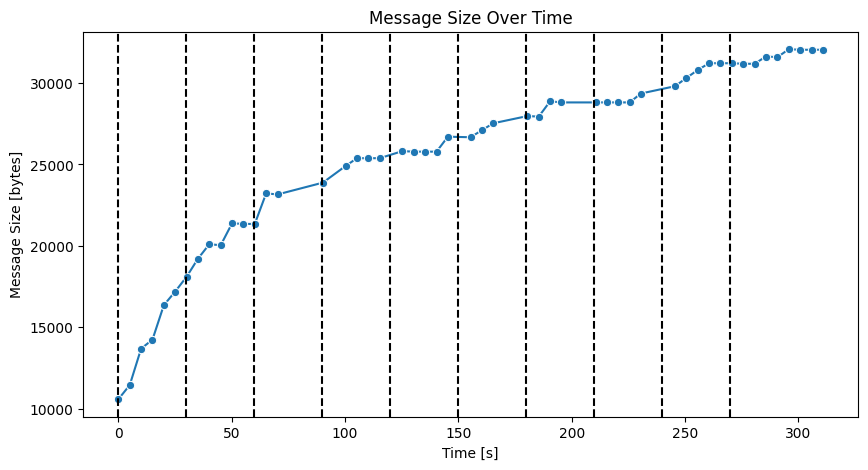

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

sent_data = total_df[(total_df["message_type"] == "SEND_MODEL") & (total_df["sending"] == True) & (total_df["num_peers"] == 9) & (total_df["from"] == "80.57.135.211:8092")  & (total_df["round"] == 1)]

sent_data['cumulative_elapsed_time'] = sent_data['start_time'].diff().fillna(0).cumsum()


sns.lineplot(x="cumulative_elapsed_time", y="message_size", data=sent_data, ax=ax, marker="o", palette="rocket")

for i in range(0, 300, 30):
    plt.axvline(x=i, color="black", linestyle="--")

plt.xlabel('Time [s]')
plt.ylabel('Message Size [bytes]')
plt.title('Message Size Over Time')


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_60120/3258066288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="elapsed_time", data=auto_join, ax=ax, palette="rocket")


Text(0.5, 1.0, 'Elapsed Time for Auto Node Join')

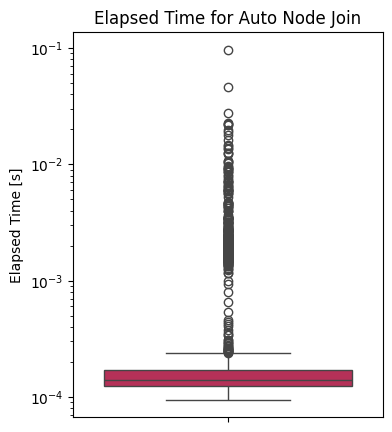

In [52]:
auto_join = total_df[(total_df["message_type"] == "AUTO_NODE_JOINED")]

fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(y="elapsed_time", data=auto_join, ax=ax, palette="rocket")

ax.set_yscale("log")

plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Auto Node Join')